In [20]:
#Nav_IMS0000_24th_feb.Asc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200126a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200126a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200126a_R0.dat',skiprows = 34, delim_whitespace=True)
nav = pd.read_csv('Nav_IMS0000_24th_jan.Asc',skiprows=14, header=None,delim_whitespace=True)
navi = nav.iloc[:,1:5]
navi.columns=['time','roll','pitch','yaw']
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 41249  178.066284  0.644363
 41369  185.633057  0.651567
 41489  193.490005  0.659546
 41609  201.247223  0.666624
 41729  208.910034  0.672922
 ...           ...       ...
 76550  107.428375  0.609991
 76670   97.549637  0.576919
 76790   84.164375  0.509205
 76910   74.633316  0.467524
 77030   67.958847  0.447258
 
 [299 rows x 2 columns],            time
 0       43530.0
 1       43530.1
 2       43530.2
 3       43530.3
 4       43530.4
 ...         ...
 333185  76848.5
 333186  76848.6
 333187  76848.7
 333188  76848.8
 333189  76848.9
 
 [333190 rows x 1 columns])

In [21]:
array = np.arange(41249 ,76849, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:22810],inplace=True)
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['time']==43530]
#df_r = data_int.iloc[0:16420,:]
#df_r

,time,F_dw,f_dir
0,43530,325.910954,0.745247
1,43530,325.955239,0.745336
2,43530,325.999525,0.745426
3,43530,326.043810,0.745515
4,43530,326.088096,0.745605
...,...,...,...
333185,76848,84.164375,0.509205
333186,76848,84.164375,0.509205
333187,76848,84.164375,0.509205
333188,76848,84.164375,0.509205


In [22]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,43530,345.452637,23.680618,368.315552,474.629272,116.152962,21.329557,325.910954,0.745247
1,43530,343.288422,24.328846,368.933014,475.453278,116.153160,21.329979,325.955239,0.745336
2,43530,340.855194,25.415541,372.147644,474.953979,116.153358,21.330400,325.999525,0.745426
3,43530,338.514343,25.763048,367.793793,474.896637,116.153557,21.330822,326.043810,0.745515
4,43530,335.891754,26.735828,364.747070,473.947754,116.153755,21.331244,326.088096,0.745605
...,...,...,...,...,...,...,...,...,...
333185,76848,100.857765,10.205178,371.479187,508.992310,-111.084564,7.902399,84.164375,0.509205
333186,76848,101.089699,10.065176,378.944214,509.730133,-111.084435,7.901966,84.164375,0.509205
333187,76848,102.144554,9.876084,382.268768,510.173706,-111.084312,7.901534,84.164375,0.509205
333188,76848,102.157036,9.592519,375.248260,510.079895,-111.084183,7.901101,84.164375,0.509205


In [23]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,43530,345.452637,23.680618,368.315552,474.629272,116.152962,21.329557,325.910954,0.745247,-0.393189,5.692995,75.047333
1,43530,343.288422,24.328846,368.933014,475.453278,116.153160,21.329979,325.955239,0.745336,-0.575213,5.714953,74.983994
2,43530,340.855194,25.415541,372.147644,474.953979,116.153358,21.330400,325.999525,0.745426,-0.736620,5.717564,74.928169
3,43530,338.514343,25.763048,367.793793,474.896637,116.153557,21.330822,326.043810,0.745515,-0.856734,5.705369,74.876480
4,43530,335.891754,26.735828,364.747070,473.947754,116.153755,21.331244,326.088096,0.745605,-0.956792,5.690160,74.820282
...,...,...,...,...,...,...,...,...,...,...,...,...
333185,76848,100.857765,10.205178,371.479187,508.992310,-111.084564,7.902399,84.164375,0.509205,1.139514,3.634203,76.894768
333186,76848,101.089699,10.065176,378.944214,509.730133,-111.084435,7.901966,84.164375,0.509205,1.282161,3.639978,76.903206
333187,76848,102.144554,9.876084,382.268768,510.173706,-111.084312,7.901534,84.164375,0.509205,1.320659,3.600651,76.912949
333188,76848,102.157036,9.592519,375.248260,510.079895,-111.084183,7.901101,84.164375,0.509205,1.299066,3.530393,76.941055


In [24]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_31jan.csv')

In [15]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(76848)

[21, 20, 48]

In [27]:
import datetime
start = datetime.datetime(2020, 1, 26, 12, 5, 30)
end = datetime.datetime(2020, 1, 26, 21, 20, 48)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_26jan.csv')

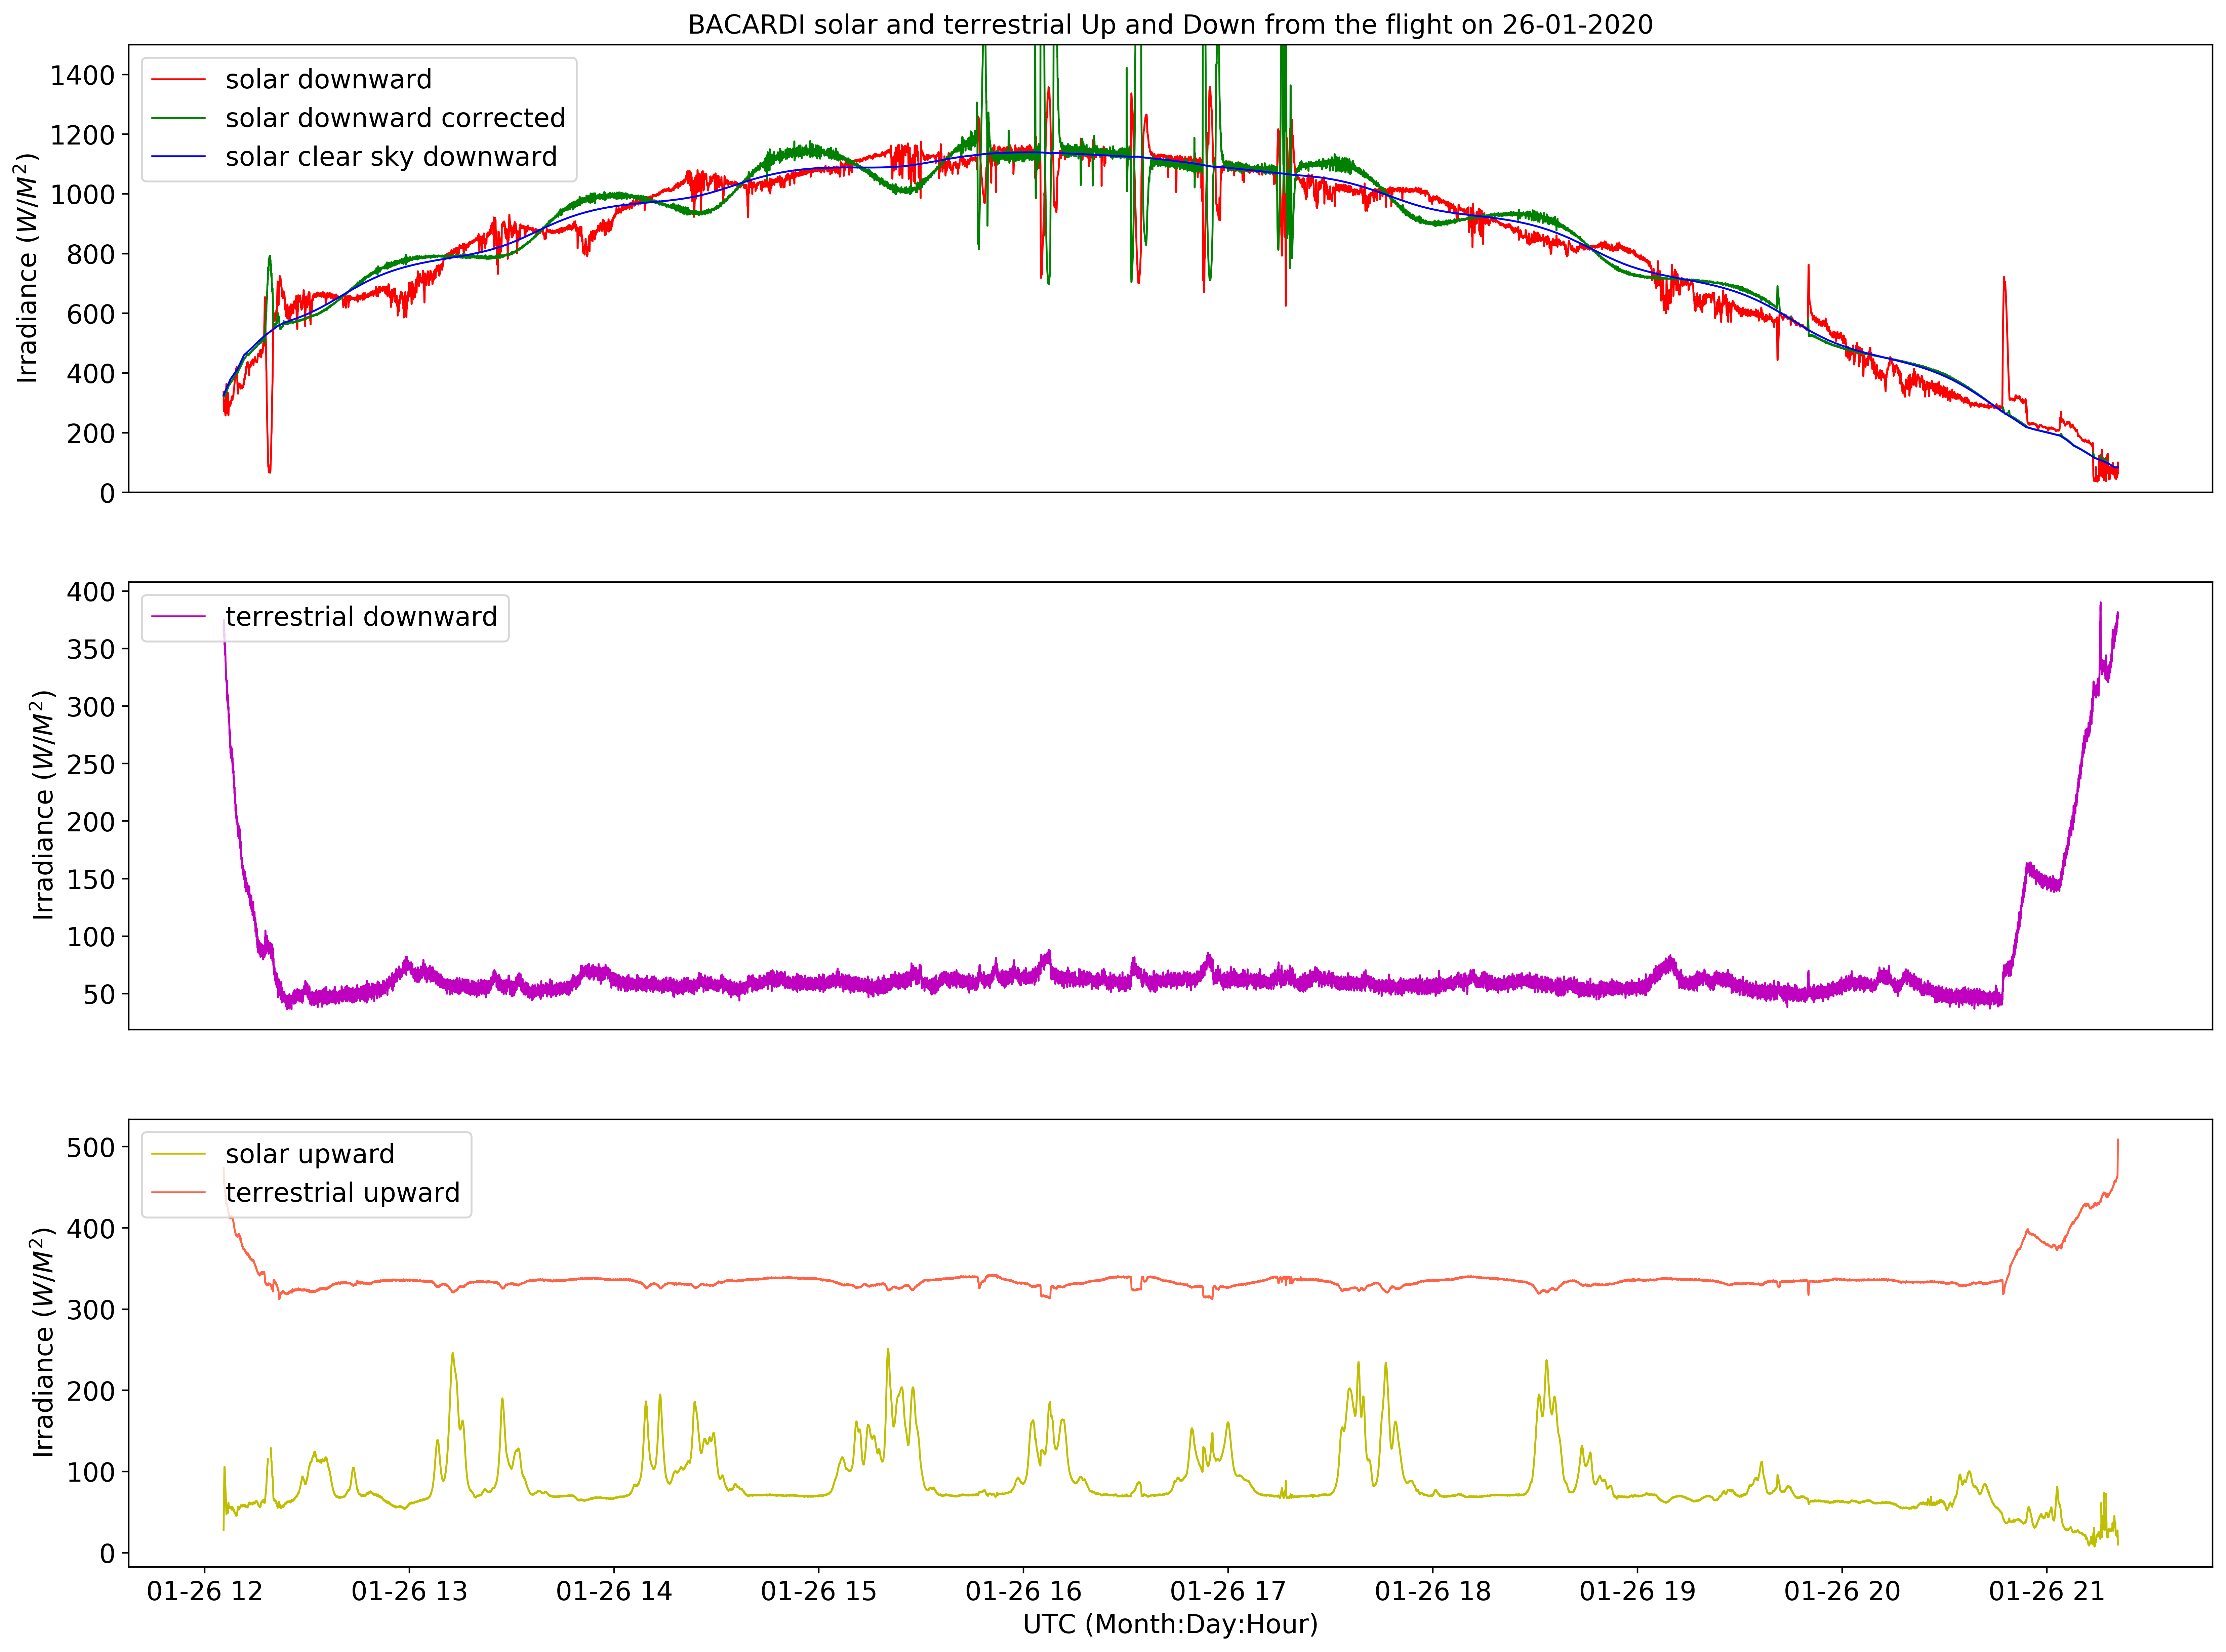

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.ylim(0,1500)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 26-01-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()